In [1]:
import os
import math
import random
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv(csv_path):
    with open(csv_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        csv_data_with_header = [row[:1] + row[-5:] for row in reader]
        _csv_header_row = csv_data_with_header[0]
        csv_raw_data = csv_data_with_header[1:]

    # 정수 데이터가 str로 저장되어 있는 것들을 int로 변환
    csv_data = []
    for sample in csv_raw_data:
        csv_data.append(list(map(int, sample)))

    # index 추출
    csv_header = dict()
    for idx, elem in enumerate(_csv_header_row):
        csv_header[elem] = idx

    return csv_header, np.array(csv_data)

### Data Loading

In [3]:
csv_path_list = [Path("final_dataset22.csv")]

# csv_path_list = [Path("drive/MyDrive/github-corr/2018_final_dataset.csv"),
#                  Path("drive/MyDrive/github-corr/2019_final_dataset.csv"),
#                  Path("drive/MyDrive/github-corr/2020_final_dataset.csv")]

In [17]:
MIN_STAR = 1
MIN_CITATION = 1
MAX_STAR = 10000
MAX_CITATION = 10000

In [18]:
csv_data = np.empty([0, 6])
for _csv_path in csv_path_list:
    _, _csv_data = read_csv(_csv_path)
    csv_data = np.concatenate((csv_data, _csv_data), axis=0)
csv_data = np.asarray(csv_data)

print(csv_data[:3])

outlier_indices = np.logical_and.reduce((
    csv_data[:, 1] <= MAX_STAR,
    csv_data[:, 1] >= MIN_STAR,
    csv_data[:, -1] <= MAX_CITATION,
    csv_data[:, -1] >= MIN_CITATION
    ))

outlier_csv_data = csv_data[outlier_indices, :]

print(outlier_csv_data[:3])

[[  0. 291.  20.  52.   5.  84.]
 [  1. 504.  18. 123.  31. 352.]
 [  2.   9.   2.   0.   1.  11.]]
[[  0. 291.  20.  52.   5.  84.]
 [  1. 504.  18. 123.  31. 352.]
 [  2.   9.   2.   0.   1.  11.]]


(1971, 6)


/var/folders/sk/z2gh9zg159x_v6kykp7hn1m40000gn/T/ipykernel_64586/741579837.py:8: RuntimeWarning: divide by zero encountered in log10
  np.log10(outlier_csv_data[:, 3]),


Text(0.5, 0, 'Citations (log10(#))')

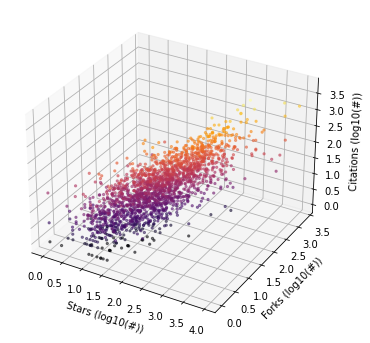

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

print(outlier_csv_data.shape)


ax.scatter(np.log10(outlier_csv_data[:, 1]),
           np.log10(outlier_csv_data[:, 3]),
           np.log10(outlier_csv_data[:, -1]),
           c=np.log10(outlier_csv_data[:, -1]),
           cmap="inferno", s=5, alpha=0.5)

ax.set_xlabel('Stars (log10(#))')
ax.set_ylabel('Forks (log10(#))')
ax.set_zlabel('Citations (log10(#))')


# ax.plot_surface(outlier_csv_data[:, 1],
#            outlier_csv_data[:, 3],
#            outlier_csv_data[:, -1],
#            cmap="inferno", s=5, alpha=0.5)

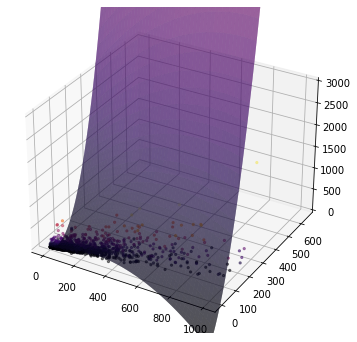

In [118]:


def regressor(star, fork, watch=0, issue=0):
    coeff = [ 0.00000000e+00,  9.57354981e-01, -1.09298742e+01,   1.64276743e+00, 
    -1.34257210e-01, -2.52272880e-03,  7.02896017e-02,   1.05592925e-02, 
    -2.68067797e-02,  5.88946376e-01, -6.68251132e-01,   6.68516991e-01, 
    4.26601720e-02,  3.56342737e-02, -1.77922489e-01]

    return coeff[0] + \
            coeff[1] * star + \
            coeff[2] * watch + \
            coeff[3] * fork + \
            coeff[4] * issue + \
            coeff[5] * star * star + \
            coeff[6] * star * watch + \
            coeff[7] * star * fork + \
            coeff[8] * star * issue + \
            coeff[9] * watch * watch + \
            coeff[10] * watch * fork + \
            coeff[11] * watch * issue + \
            coeff[12] * fork * fork + \
            coeff[13] * fork * issue + \
            coeff[14] * issue * issue

interp_number = 100

xdata = np.linspace(MIN_STAR, MAX_STAR, interp_number)
ydata = np.linspace(np.amin(outlier_csv_data[:, 3]), np.amax(outlier_csv_data[:, 3]), interp_number)
X, Y = np.meshgrid(xdata, ydata)
Z = regressor(X, Y, watch=np.mean(outlier_csv_data[:, 2]), issue=np.mean(outlier_csv_data[:, 4]))
# Z = regressor(X, Y)

ax.set_zlim(0, 3000)
ax.plot_surface(X, Y, Z, cmap="inferno", alpha=0.2)
fig

In [119]:
from matplotlib import animation 

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate,
                               frames=360, interval=20, blit=True)
# Save
anim.save('mpl3d_scatter.gif', fps=30)

KeyboardInterrupt: 